<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   matchup         906 non-null    object 
 1   game_date       906 non-null    object 
 2   type_of_hit     906 non-null    object 
 3   exit_velocity   580 non-null    float64
 4   predicted_zone  906 non-null    int64  
 5   camera_zone     393 non-null    float64
 6   used_zone       906 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 39.0+ KB

Total number of incorrect predictions: 11



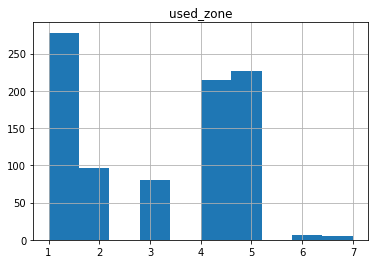

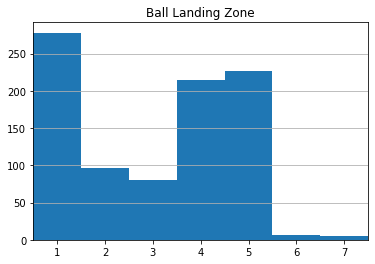

In [31]:
# Ian Hochstead
# Professor Imran
# Data Analytics in Python
# Project 3
# July 2021
#
# I found a data set consisting of the location of foul balls
# that landed in the stands, potentially injuring spectators.
# https://fivethirtyeight.com/features/we-watched-906-foul-
#             balls-to-find-out-where-the-most-dangerous-ones-land/
# The stands were divided into 7 zones, as shown in the 
# associated file "zone-diagram.webp".  As shown, many stadiums 
# already have netting protecting spectators in zones 1, 2, and 
# 3.  I was curious what options, if any are available to better
# protect spectators.  (Please see the end of the file for 
# my conclusions.)  
#  

import pandas as pd
import matplotlib.pyplot as plt  

# Read in the dataframe (csv file)
# I don't think this data set is directly available online.
# This line will have to be changed to reflect the end 
# user's data file location.  My off-line data file location:  
df = pd.read_csv('C:\\Users\\ian\\Downloads\\LGA\\baseball\\foul-balls.csv')
   
# Get some general information about the data set 
# especially the number of columns and rows.
df.info()
  
# I noted that there is a predicted location, and it seemed
# highly accurate, so I wanted to more specifically determine
# how accurate it is.  
# Determine (count) the number of incorrect predictions
totalIncorrect = 0
for currentRow in df.index:
    if df.predicted_zone[currentRow] != df.used_zone[currentRow]:
         totalIncorrect += 1
    
print("\nTotal number of incorrect predictions: " + str(totalIncorrect) + "\n")

# Delete the calumn camera_zone, it is only sparsely populated.
del df['camera_zone']
 
# Draw the default histogram of the different landing zones.
df.hist(column = 'used_zone')

# Draw a much better histogram of the different landing zones.
# Use 7 bins instead of 10, correct the range of the bins, 
# put the number label of each bin in a better place.
# The re-positioning of the number label of each bin now does 
# not work with the vertical grid lines, so turn off all grid lines.
df.hist(column = 'used_zone', bins = 7, range = (1,8), align = 'left', 
                     grid = False)
# Add a better title to the histogram.  
plt.title('Ball Landing Zone')
# Remove the space (margins) on the sides of the histogram.
# (Personally I think it is confusing.)
plt.margins(x = 0)
# Put back the vertical grid lines.  
plt.gca().yaxis.grid(True)

#
# Final thoughts:
#
# I found the histogram for this data set highly interesting.
# It can be clearly seen that the most balls land in zone 1, 
# followed zones 4 and 5.  Zones 2 and 3 do have some balls 
# land in those areas but not as many as in zones 4 and 5.
# I would strongly encourage additional netting protecting 
# spectators seated in zones 4 and 5.  I also wonder if 
# netting can be removed from zones 2 and 3 or transferred 
# from zones 2 and 3 to zones 4 and 5.  Again as shown
# by the histogram, this would enable the netting to 
# block the most balls.
#
# As mentioned earlier, I was also impressed by the 
# accuracy of the predicted zone data, 895 correct
# out of 906 near 99% correct.  Therefore, I also wonder
# if instead of or in addition to netting, some sort 
# warning system could be used, such as siren, flashing 
# lights, etc.
#

